### **Predicting Customer's Credit Card Churn Using Machine Learning Algorithms**

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline

In [2]:
#this data was downloaded from Kaggle. 
#the data was loaded into jupyter with the help of Pandas dataframe (a python library)
df=pd.read_csv('BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [3]:
#checking the first five rows of the dataframe
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
#checking the last five rows of the dataframe
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [5]:
#the last two columns were dropped because they seem unimportant
df =df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)

In [6]:
#getting more information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

This dataset contains 10,127 entries with 21 features which is the shape of the data i.e 10127 rows and 21 columns.

The column Attrition_flag is the target_feature which shows if a customer will churn on their credit_card or not. This data also contains 10 integer data types, 5 float data types and 6 object data types and no missing values.

In [7]:
df.isnull()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10124,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10125,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


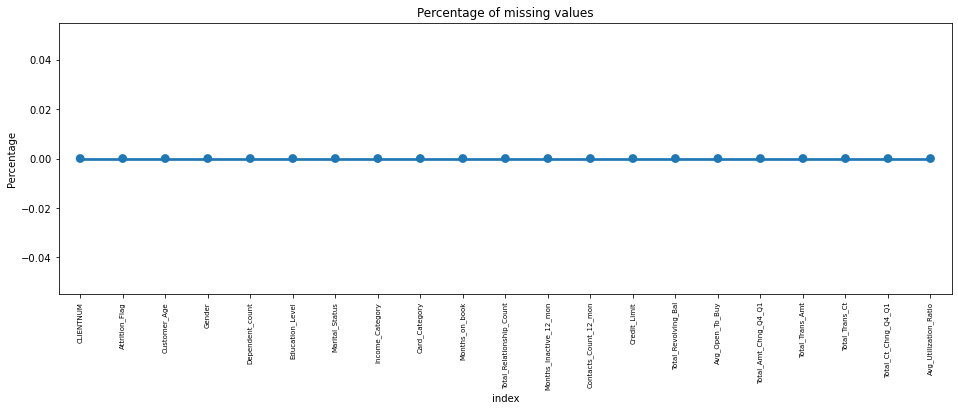

In [8]:
#to find the percentage of missing value.
missing = pd.DataFrame((df.isnull().sum()) *100/df.shape[0]).reset_index()
plt.figure(figsize= (16, 5))
ax = sns.pointplot('index', 0, data=missing)
plt.xticks(rotation =90, fontsize=7)
plt.ylabel('Percentage')
plt.title('Percentage of missing values')
plt.show()

In [9]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [10]:
df['Attrition_Flag'].describe()

count                 10127
unique                    2
top       Existing Customer
freq                   8500
Name: Attrition_Flag, dtype: object

In [11]:
df['Attrition_Flag'].value_counts(' %')
#to get the percentage ratio

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

this is a binary classification problem. i.e the column are are trying to predict is divided into two class (existing customer and attrited customer. Other exampls of binary classification includes Yes or NO, Churn or not churn, diabetic or non diabetic, cat or dog, malignant or benign and so on.

the ratio of Existing customer to Attrited customer is 84: 16 which means this is an imbalanced data. Imbalance data means that the ratio isn't 50:50. (note : 45:50 or 50:45 is also considered a less balanced data). The model created on a balanced data is termed an efficient model while the one created on an imbalanced data is termed an inefficient model. There could be a problem of overfitting with an imbalance data (overfitting is when the model performs well on the training data and less on the test data)

Dealing with imbalanced data, we can used 2 techniques called |Upsampling or Downsampling Upsampling means creating a synthetic record for the low class to measure up to the size of the upper class. Downsampling means triming down the size of the upper class to match that of the lower class. In downsampling, some of the data or useful information might be lost

note: in most cases, upsampling gives better results than downsampling because with upsampling there's more data to train with while there's less data to train with in downsampling

Hence, our model will be built on a balanced dataset. 

In [12]:
#checking the unique value
print("Attrition_Flag :",df["Attrition_Flag"].unique())
print("Gender         :",df["Gender"].unique())
print("Education_Level:",df["Education_Level"].unique())
print("Marital_Status :",df["Marital_Status"].unique())
print("Income_Category:",df["Income_Category"].unique())
print("Card_Category  :",df["Card_Category"].unique())

Attrition_Flag : ['Existing Customer' 'Attrited Customer']
Gender         : ['M' 'F']
Education_Level: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status : ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category  : ['Blue' 'Gold' 'Silver' 'Platinum']


In [13]:
list(df)

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [14]:
type(df)

pandas.core.frame.DataFrame

In [15]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [16]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

### **Univariate Plots**
Each feature will be ploted to study their distributions


### **Attrition Flag**
This is the target feature which informs us whether a client has decided closed their account or not

Text(0.5, 1.02, 'Target Variable per category')

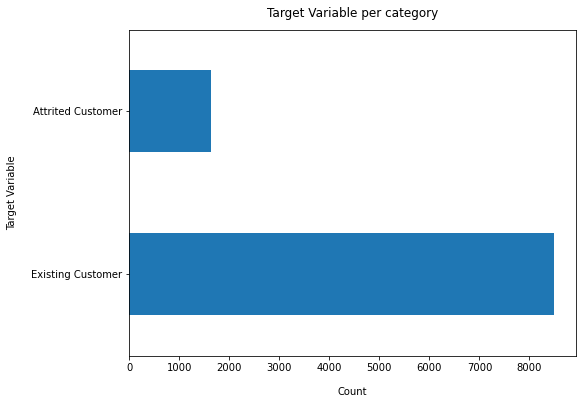

In [17]:
df['Attrition_Flag'].value_counts().plot(kind="barh", figsize=(8, 6))
plt.ylabel('Target Variable',labelpad =14)
plt.xlabel('Count', labelpad =14)
plt.title('Target Variable per category', y=1.02)

The plot above shows that only a small portion of the customers have churned, henced an imbalanced dataset

The categorical features of this data set are Gender, Education Level, Marital Status, Income gategory and Card Category. Hence, we need to plot a bar chart for each feature to study the distribution

###1 *Plot distribution of individual predictors by Attrition_Flag

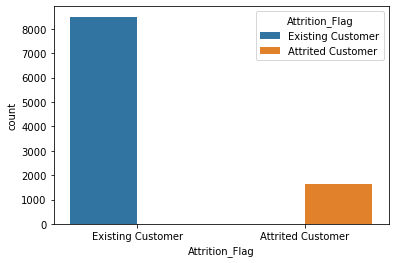

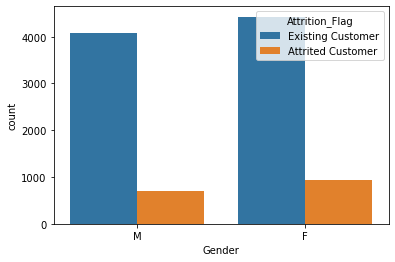

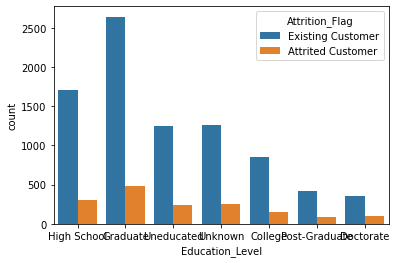

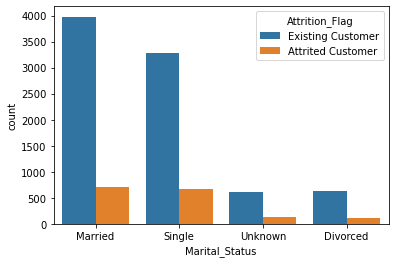

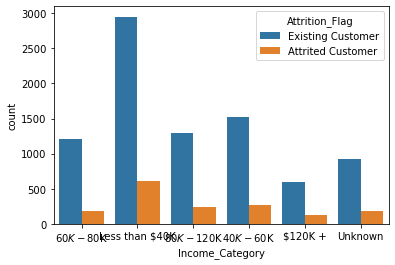

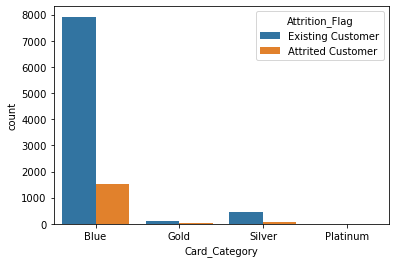

In [18]:
for i, predictor in enumerate(df.drop(columns=['CLIENTNUM', 'Customer_Age',
       'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'])):
  plt.figure(i)
  sns.countplot(data=df, x= predictor, hue='Attrition_Flag')

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


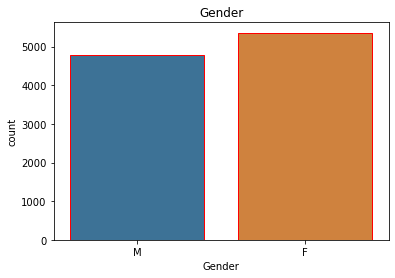

In [19]:
plt.figure(2)
plt.title("Gender")
sns.countplot(df['Gender'],edgecolor = 'red',saturation = 0.60)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


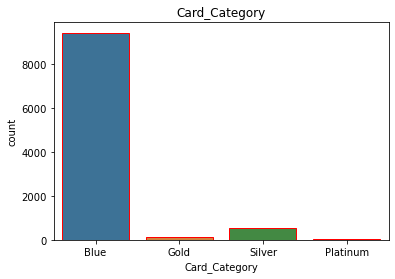

In [20]:
plt.figure(2)
plt.title("Card_Category")
sns.countplot(df['Card_Category'],edgecolor = 'red',saturation = 0.60)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


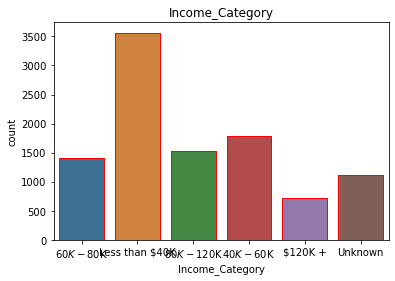

In [21]:
plt.figure(6)
plt.title("Income_Category")
sns.countplot(df['Income_Category'],edgecolor = 'red',saturation = 0.60)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


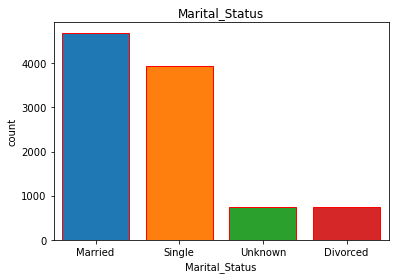

In [22]:
plt.figure(4)
plt.title("Marital_Status")
sns.countplot(df['Marital_Status'],edgecolor = 'red',saturation = 20)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


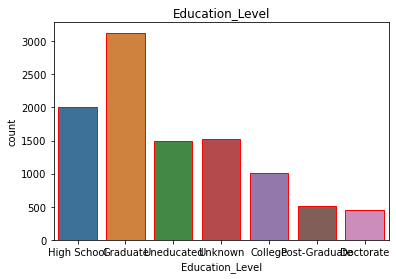

In [23]:
plt.figure(5)
plt.title("Education_Level")
sns.countplot(df['Education_Level'],edgecolor = 'red',saturation = 0.60)
plt.show()

The following observations were deduced frrom the chats:
* The dataset is almost evenly distributed amongst males and females
* Almost half of the customers are married
* The most common income category is 'Less than $40k'
* More than 90% of the customers are Blue tier of the credit card 

### **Setting Two Types of Hypothesis**

Null hypothesis (H0)
* Predicted associations/differences do not exist (No 
change)

• Alternative hypothesis (H1)
Predicted associations/differences do exist 





In [24]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [25]:
df['Credit_Limit'].value_counts()

34516.0    508
1438.3     507
15987.0     18
9959.0      18
23981.0     12
          ... 
10587.0      1
15340.0      1
34427.0      1
4975.0       1
3741.0       1
Name: Credit_Limit, Length: 6205, dtype: int64

### **SETTING HYPOTHESIS**

# “Null hypothesis”

1, (H0) “There is no statistically significant difference in the 
mean Credit limit between income category Less than $40k and Income category greater than $120k”.  
“Alternative hypothesis”
(H1) “There is a statistically significant difference in the 
mean Credit limit between income category Less than $40k and Income category greater than $120k”

1, Is there a statistically significanr difference in the mean credit limit between income category less than $40k  and  Income  category greater than $120k

2, Does the Education Level determines the type of card category that can be obtained by a customer?


T-test and Chi-square test are run to addewss the following research questions above

In [26]:
df['Credit_Limit'].mean()


8631.953698034848

In [27]:
#because our interest is in income categories 'less than $40k and  Greater than $200k, we will create two subsets and then see the distributions of Credit_limit in the two subsets
Less_than_40k = df[df['Income_Category'] == "Less than $40K"] 
Greater_than_200k = df[df['Income_Category'] == "$120K +"] 

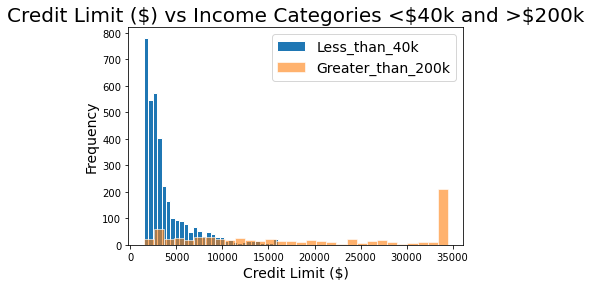

In [28]:
Less_than_40k['Credit_Limit'].plot.hist(bins = 30, edgecolor = 'white', 
linewidth = 1.0, label = 'Less_than_40k') 
Greater_than_200k['Credit_Limit'].plot.hist(bins = 30, edgecolor = 'white', 
linewidth = 1.0, alpha = 0.6, label = 'Greater_than_200k') 
plt.title('Credit Limit ($) vs Income Categories <$40k and >$200k', 
fontsize = 20) 
plt.xlabel('Credit Limit ($)', fontsize = 14) 
plt.ylabel('Frequency', fontsize = 14) 
plt.legend(fontsize = 14) 

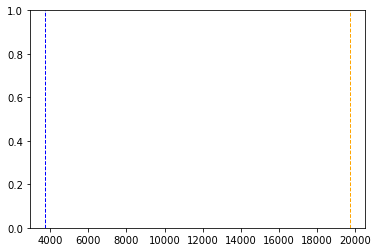

In [29]:
plt.axvline(Less_than_40k['Credit_Limit'].mean(), color = 'blue', linestyle 
= 'dashed', linewidth = 1) 
plt.axvline(Greater_than_200k['Credit_Limit'].mean(), color = 'orange', 
linestyle = 'dashed', linewidth = 1) 

In [30]:
#is the difference between the two means statistically significanr? We will run a t-test to reach a conclusion


### **Data Assumption**
# Few Data Assumptions for T-tests:
1. Independence - the Credit_limit for income category less_than $40k does not depend on those greater than $200k
2. Continuous data
3. The variance ( spread of data) between the two groups must be equal ( We will use Welch's t-test to avoid this assumption)
4. The sampling distribution of the statistic being normally distributed. 

In [31]:
#To obtain the mean credit_limit for both subsets
Less_than_40k['Credit_Limit'].mean()


3754.4045212019205

In [32]:
Less_than_40k['Credit_Limit'].describe()

count     3561.000000
mean      3754.404521
std       2759.888288
min       1438.300000
25%       2021.000000
50%       2766.000000
75%       4271.000000
max      15987.000000
Name: Credit_Limit, dtype: float64

In [33]:
Greater_than_200k['Credit_Limit'].mean()

19717.322558459422

In [34]:
Greater_than_200k['Credit_Limit'].describe()

count      727.000000
mean     19717.322558
std      12064.309210
min       1438.300000
25%       8466.500000
50%      18442.000000
75%      34516.000000
max      34516.000000
Name: Credit_Limit, dtype: float64

Obtain T-Statistic, P-value and Effect Size

In [35]:
#running a t-test to see if the difference in mean credit_limit in both subsets are statistically significant

#Import the stats function gtom the scipy package as 'st'
import scipy.stats as st

In [36]:
st.ttest_ind(Less_than_40k['Credit_Limit'], Greater_than_200k['Credit_Limit'], equal_var = False)
#By setting equal_var as Fal;se, we run Welch's t-test and disregard variances being equal between the two groups, which is one of the data assumptions for t-tests.

Ttest_indResult(statistic=-35.48700102775806, pvalue=5.381933555805922e-162)

In [37]:
#we will assigned these two values (t-statistic and p-value) to t and p respectively
t, p = st.ttest_ind(Less_than_40k['Credit_Limit'], Greater_than_200k['Credit_Limit'], equal_var = False)

In [38]:
#after this, we will calculate the effect size for a t-statistic using the formula below.
# n = 3651 for subset1 and n= 727 for subset 2
import math
r = math.sqrt(t**2/(t**2 + (3651 + 727 - 2)))

In [39]:
print('t=', round(t, 3))
print('p= ', round(p, 3))
print('r=', round(r, 3))

t= -35.487
p=  0.0
r= 0.473


### Reporting the T-Test Results

Based on the outputs calculated, in response to the first research question, we can deduce that:

there is a statistically significant differece found in the mean credit_limit between subset one and subset 2 (t= -35.478, p=0.0) with the mean credit limit for income category Less_than_40k being at $3754 and Greater_than_200k being at $19717 and with a medium effect size (r= 0.473).

The mean credit limit for income category greater than 200k seems to be highter by about $16000 and the difference is found to be statistically significant.

 **Based on this, we reject the null hypothesis and support the alternative hypothesis**

### **Running a Chi-Square Test**
Chi-square test is another bi-variate statistical analysis which runs on categorical data. We will be running this test on the second research question.

* Does the Education Level determines the type of card category that can be obtained by a customer?

Data Assumption
A chi-square test entails only a few data assumptions, and it is important for the data to meet them. They are:

1. Two variables are categorical/randomly sampled
2. Observations should be independent from each other.
3. No 'expected' count in any cell should be zero.
4. No more than 20% of the cells have an 'expected' count < 5.


In this exercise, we are aware that the first two assumptions have been met. SO therefore, we will check for the last two assumptions separately.

### Creating a Contigency Table/Crosstab

We will need to know the number of categories contained within one feature. 

In [40]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [41]:
#a crosstab is a table that will allow us to view the number of cases that fallpd.crosstab(df['Education_Level'], df['Card_Category'], margins= True, normalize='index')s into different categories created by two or more variables.
pd.crosstab(df['Education_Level'], df['Card_Category'], margins= True)

Card_Category,Blue,Gold,Platinum,Silver,All
Education_Level,,,,,
College,940,15,0,58,1013
Doctorate,422,5,2,22,451
Graduate,2899,36,8,185,3128
High School,1888,26,1,98,2013
Post-Graduate,476,5,3,32,516
Uneducated,1391,11,3,82,1487
Unknown,1420,18,3,78,1519
All,9436,116,20,555,10127


In [42]:
pd.crosstab(df['Education_Level'], df['Card_Category'], margins= True, normalize='index')

Card_Category,Blue,Gold,Platinum,Silver
Education_Level,,,,
College,0.927937,0.014808,0.000000,0.057256
Doctorate,0.935698,0.011086,0.004435,0.048780
Graduate,0.926790,0.011509,0.002558,0.059143
High School,0.937904,0.012916,0.000497,0.048684
Post-Graduate,0.922481,0.009690,0.005814,0.062016
Uneducated,0.935440,0.007397,0.002017,0.055145
Unknown,0.934826,0.011850,0.001975,0.051350
All,0.931767,0.011455,0.001975,0.054804


<AxesSubplot:xlabel='Education_Level'>

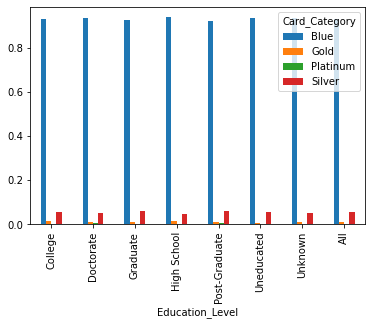

In [43]:
pd.crosstab(df['Education_Level'], df['Card_Category'], margins= True, normalize='index').plot.bar()

<AxesSubplot:xlabel='Education_Level'>

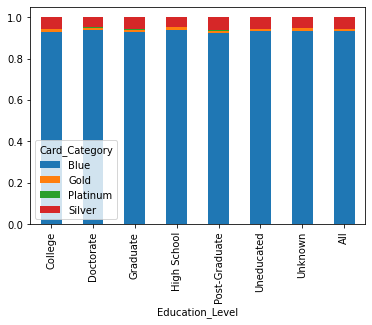

In [44]:
pd.crosstab(df['Education_Level'], df['Card_Category'], margins= True, normalize='index').plot.bar(stacked=True)

In [45]:
#To run a chi-squared test, we will use researchpy

!pip install researchpy
import researchpy as rp

In [46]:
rp.crosstab(df['Education_Level'], df['Card_Category'], test ='chi-square', expected_freqs= True)
#thecode line above will create 3 outputs (a crosstab, chi-square test and relevant statistics, expected count)

(                Card_Category                            
 Card_Category            Blue Gold Platinum Silver    All
 Education_Level                                          
 College                   940   15        0     58   1013
 Doctorate                 422    5        2     22    451
 Graduate                 2899   36        8    185   3128
 High School              1888   26        1     98   2013
 Post-Graduate             476    5        3     32    516
 Uneducated               1391   11        3     82   1487
 Unknown                  1420   18        3     78   1519
 All                      9436  116       20    555  10127,
                  Chi-square test  results
 0  Pearson Chi-square ( 18.0) =   17.6289
 1                     p-value =    0.4803
 2                  Cramer's V =    0.0241,
                 Card_Category                                 
 Card_Category            Blue       Gold  Platinum      Silver
 Education_Level                                 

In [47]:
crtb, test, expt = rp.crosstab(df['Education_Level'], df['Card_Category'], test ='chi-square', expected_freqs= True)

### **Reporting the outputs of chi-square test.**

There does not seem to be a significant association between the education_level and card_cartegory x2(18) = 17.6289, p= 0.4803, despite the low effect size (cramer's V =.024)

* H0 (null's hypothesis): There is no association between education and card category
* H1 (alternate hypothesis): There is statistically significant association between Education level and work life balance.

Based on the output above, we accept the null's hypothesis

### **CORRELATION TEST AND SIMPLE LINEAR REGRESSION **

Question : Is the  amount of Credit_Limit a customer has access to correlated with the average amount a customer is open to buy  (Avg_Open_To_Buy)?

H0 - There is no statistically significant correlation between the Credit_limit and Avg_Open_To_Buy.

H1 - There is a statistically significant correlation between the Credit_limit and Avg_Open_To_Buy

In [48]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = [20, 10]


#import pandas  as pd #Data manipulation
#import numpy as np #Data manipulation
#import matplotlib.pyplot as plt # Visualization
#import seaborn as sns #Visualization
#plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
#plt.style.use('seaborn-whitegrid')

In [49]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


Text(0.5, 1.0, 'Credit Limit vs Avg_Open_To_Buy')

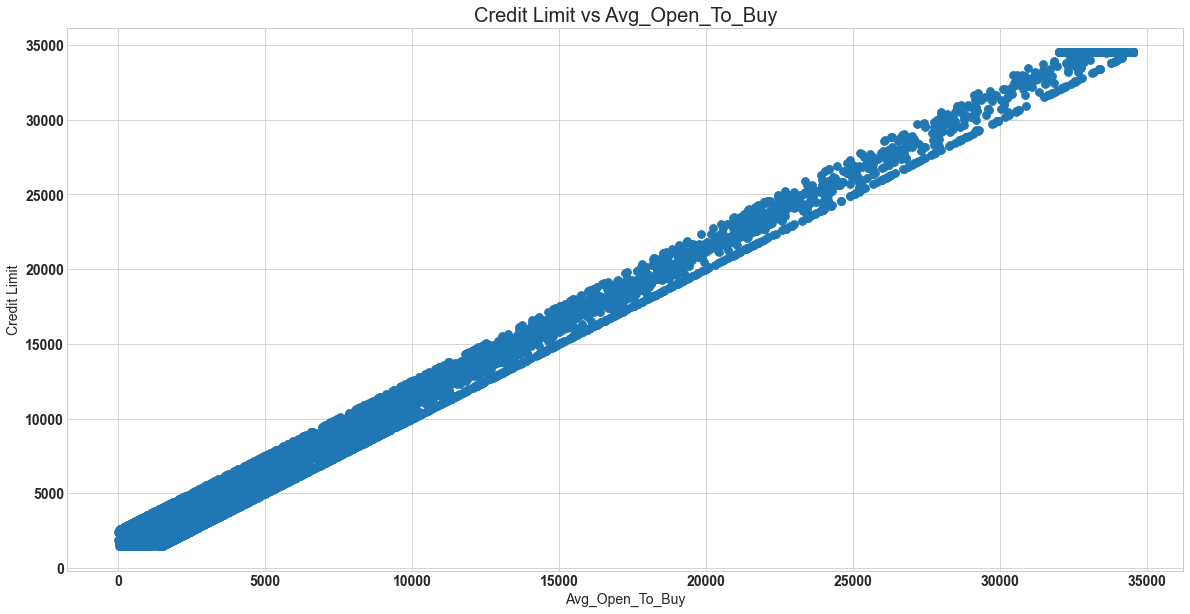

In [50]:
plt.scatter(df['Avg_Open_To_Buy'], df['Credit_Limit'], s=60) #"s" for  size of data points
plt.ylabel('Credit Limit', fontsize = 14)
plt.xlabel('Avg_Open_To_Buy', fontsize = 14)
plt.title("Credit Limit vs Avg_Open_To_Buy", fontsize = 20)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Credit Limit vs Avg_Open_To_Buy')

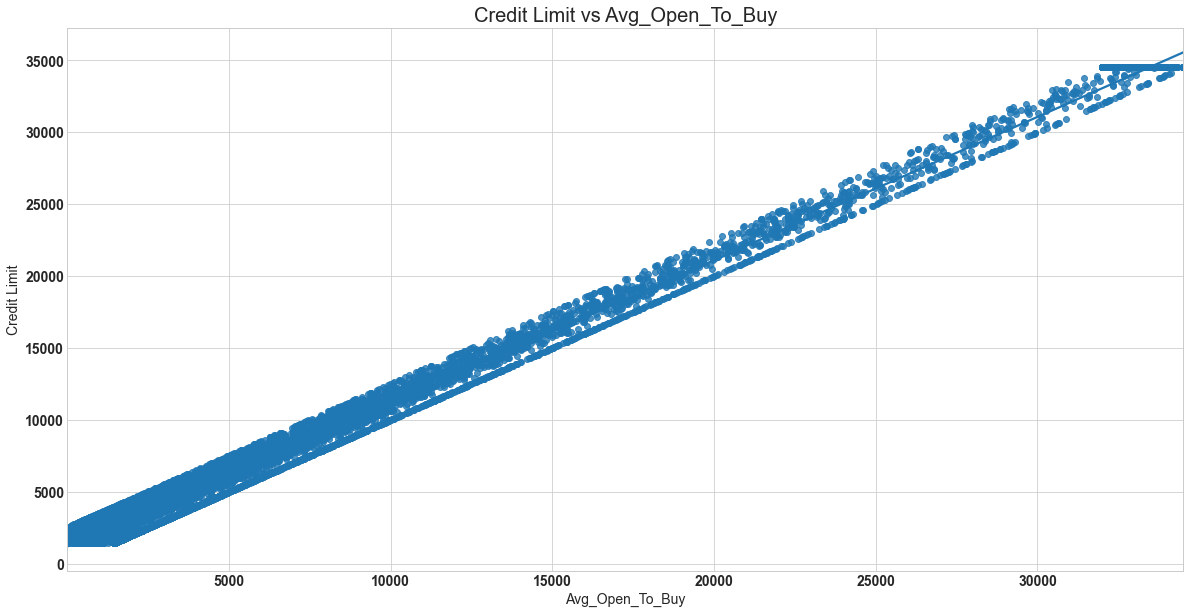

In [51]:
sns.regplot(df['Avg_Open_To_Buy'], df['Credit_Limit'], ci = None) #ci == Confidence interval 
plt.ylabel('Credit Limit', fontsize = 14) #by setting ci as none, a straight line is drawn
plt.xlabel('Avg_Open_To_Buy', fontsize = 14)
plt.title("Credit Limit vs Avg_Open_To_Buy", fontsize = 20)

### **Running the Correlation Test**
The variables seems to be in a linear relationship, so we will conduct the Pearson's correlation Test.

In [52]:
from scipy.stats.stats import pearsonr #Pearson's

<ipython-input-52-df98cc0a531f>:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr #Pearson's


In [53]:
r, p = pearsonr (df['Avg_Open_To_Buy'], df['Credit_Limit'])

In [54]:
print("r =", round (r,3))
if p < .001:
  print("p < .001")
elif p < .01:
  print("p < .01")
elif p < .05:
  print("p < .05")
else:
  print("Not significant")

r = 0.996
p < .001


### **Reporting Ouitputs of the Correlation Test**

Based on the following output, we can say that there is a statistically positive correlation (r= 0.996, p< 0.001) between the credit limt and Average Open to Buy.

Hence, the findings reject null hypotheses and supports alternative hypothesis based on both p-values and correlation coefficients (efect size)

In [55]:
#Chi-square test : measure the strength of an association between two vategorical variable
#Correlation test: Measure the strength of an association betweeen two continuous variables

### **Data Visualization contd..**

There are integer features that can be visualize using a histogram because they have a small range.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


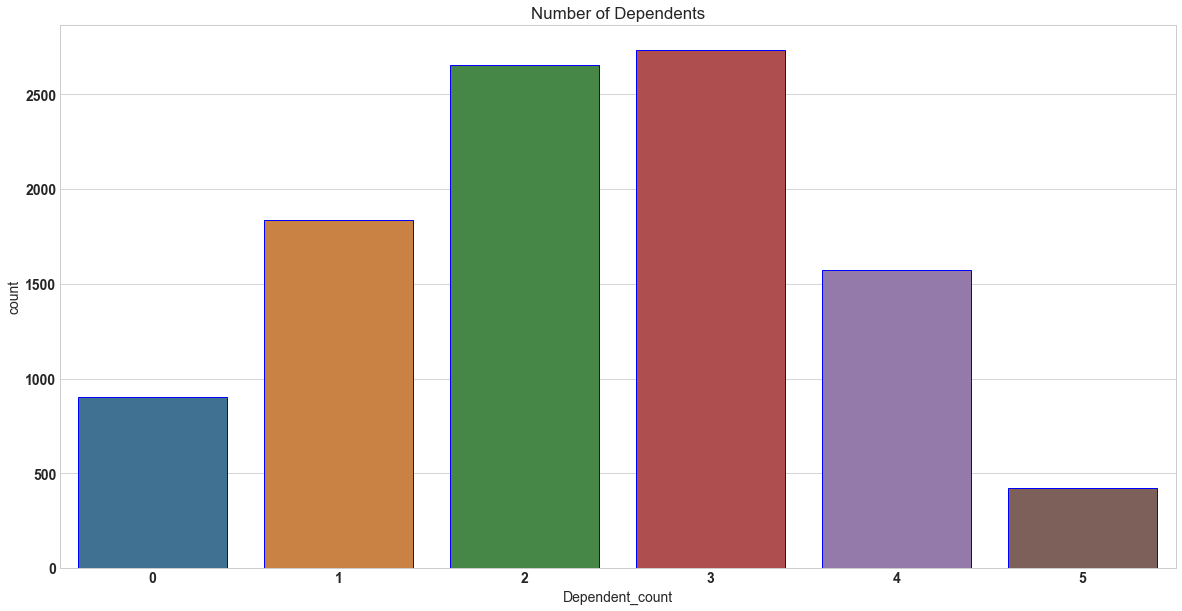

In [56]:
plt.figure(7)
plt.title('Number of Dependents')
sns.countplot(df['Dependent_count'],edgecolor = 'blue',saturation = 0.55)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


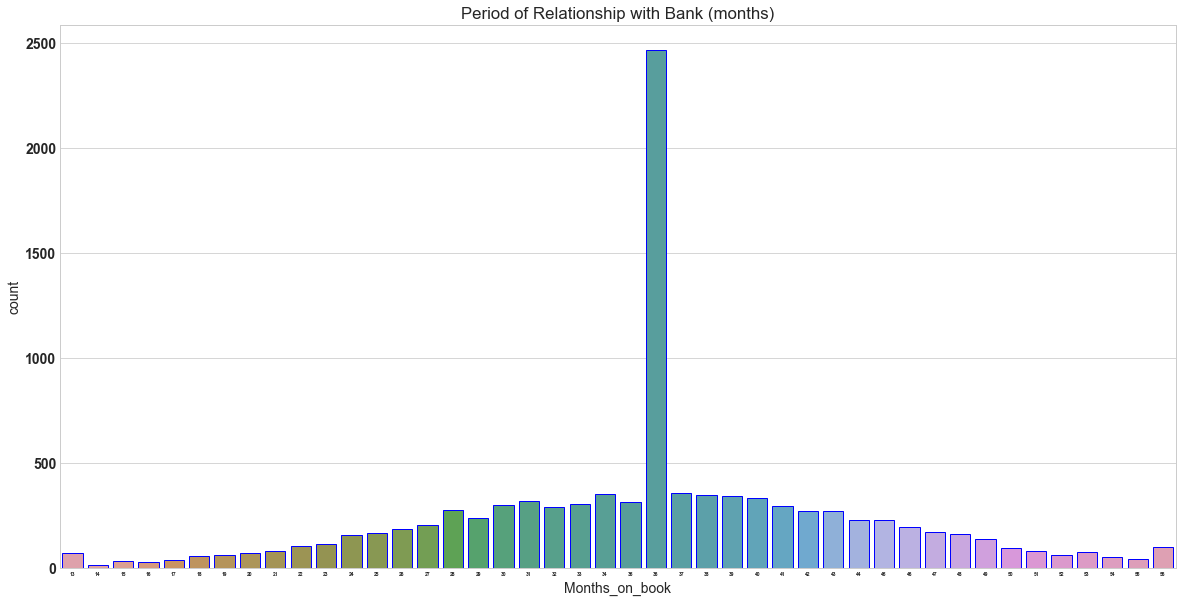

In [57]:
plt.figure(8)
plt.title('Period of Relationship with Bank (months)')
fig8 = sns.countplot(df['Months_on_book'],edgecolor = 'blue',saturation = 0.55)
fig8.set_xticklabels(fig8.get_xticklabels(),fontsize=5)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


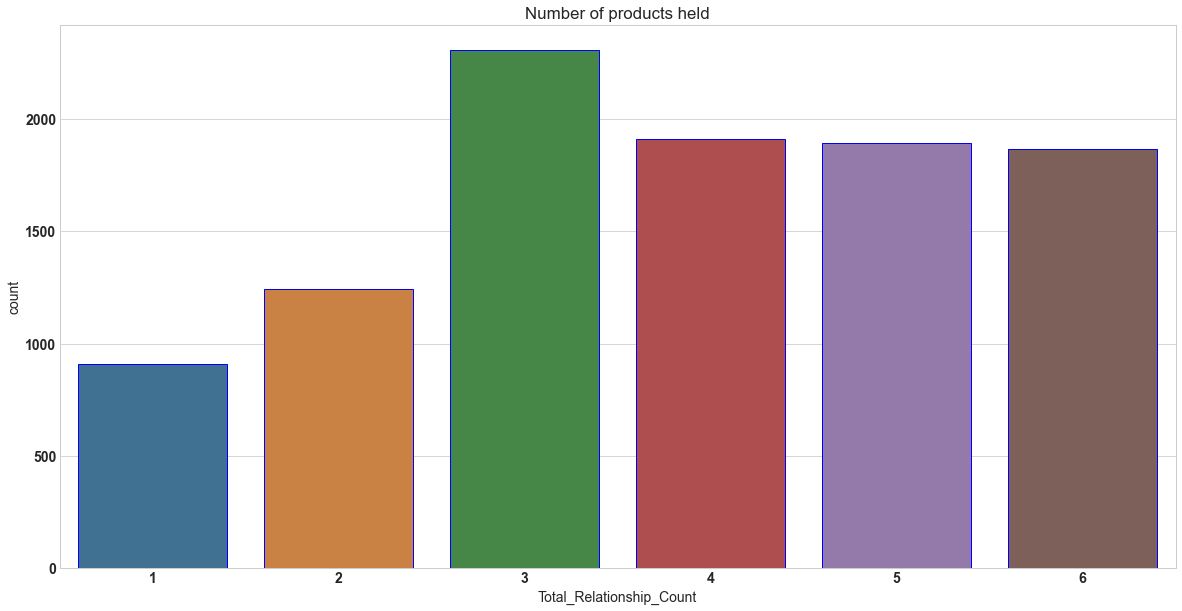

In [58]:
plt.figure(9)
plt.title('Number of products held')
sns.countplot(df['Total_Relationship_Count'],edgecolor = 'blue',saturation = 0.55)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


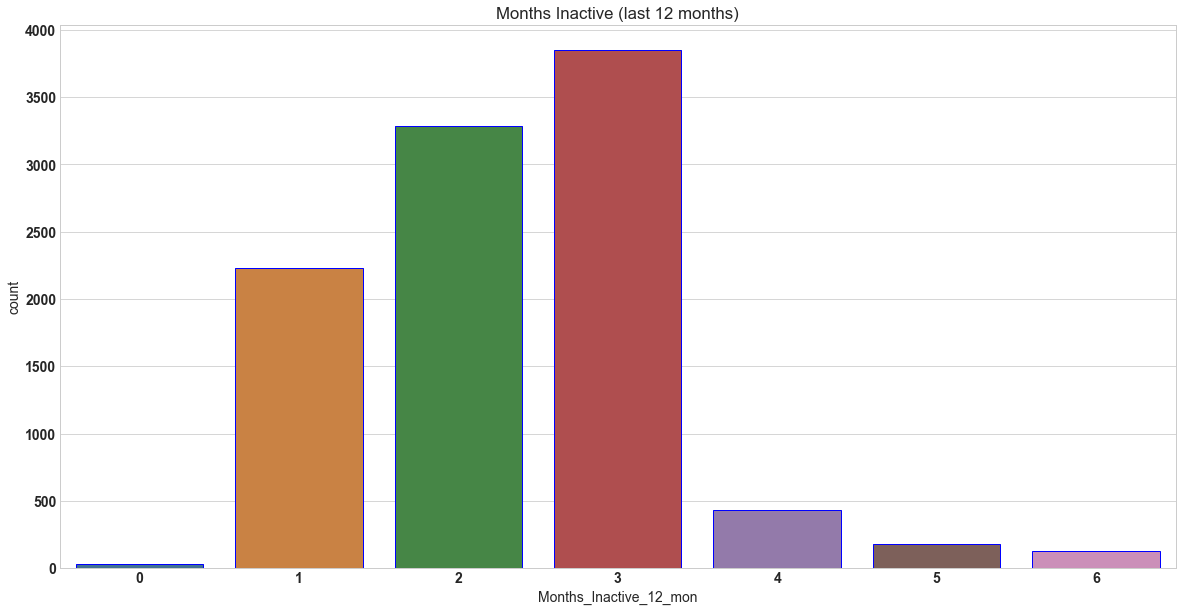

In [59]:
plt.figure(10)
plt.title('Months Inactive (last 12 months)')
sns.countplot(df['Months_Inactive_12_mon'],edgecolor = 'blue',saturation = 0.55)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


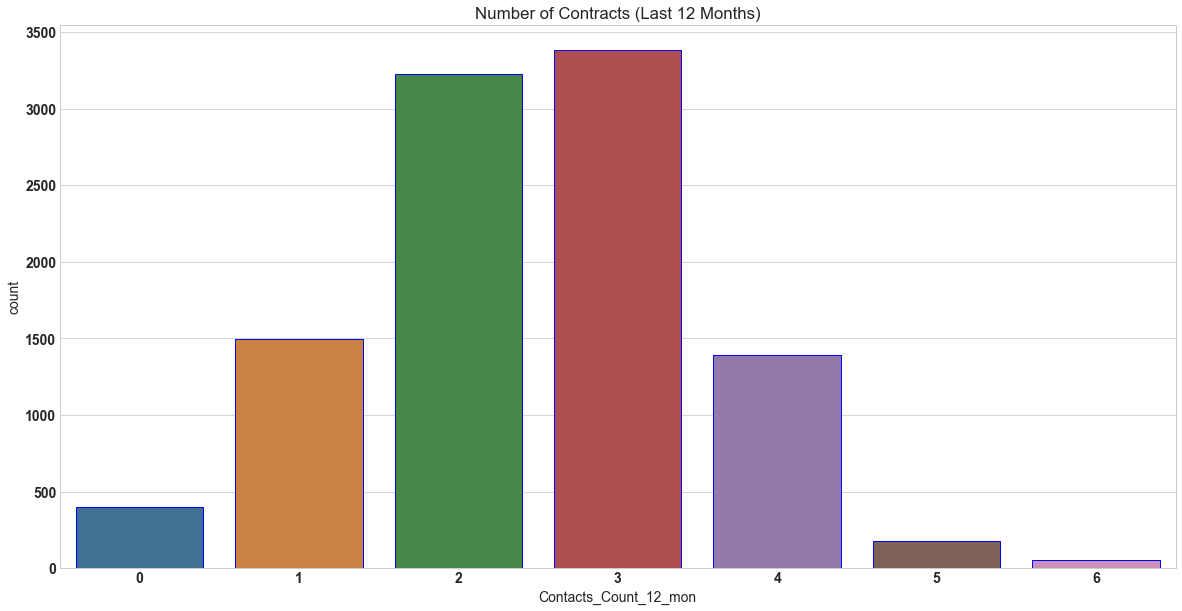

In [60]:
plt.figure(11)
plt.title('Number of Contracts (Last 12 Months)')
sns.countplot(df['Contacts_Count_12_mon'],edgecolor = 'blue',saturation = 0.55)
plt.show()

 the following observations were made from the chats above:

* A majority of the customers have either 2 or 3 dependents.
* Most customers have exactly a 36-month, i.e., 3 year relationship with the bank. This is an outlier value, that may have occured as 3 years is a rounded figure, and most customers willing to end their relationship with the bank around that time tend to round it to 3 years.
* Most customers hold 3 or more products.
* Almost all of the customers have been inactive for only 3 months or fewer in the past 12 months.
* Most customers hold 3 or fewer contracts in the past 12 months.

In [61]:
#Correlation Matrix

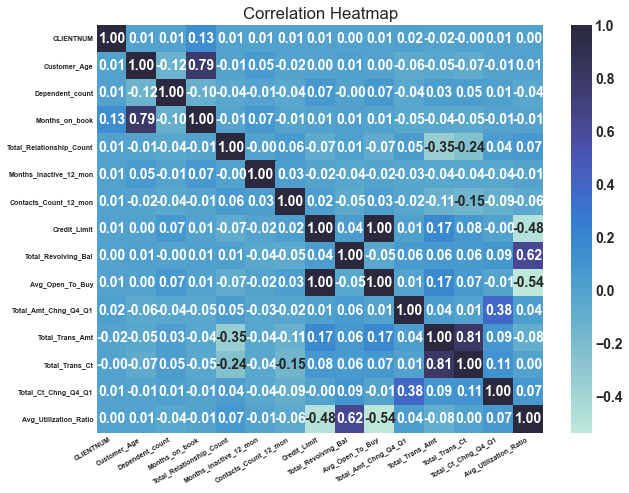

In [62]:
plt.figure(figsize=(10,7.5))
fig_hm = sns.heatmap(df.corr(), annot=True, fmt=".2f",center=1.3)
fig_hm.set_xticklabels(fig_hm.get_xticklabels(),rotation = 30,ha = "right", fontsize=7)
fig_hm.set_yticklabels(fig_hm.get_yticklabels(),fontsize=7)
plt.title('Correlation Heatmap')
plt.show()

Some of the strong correlations we observe are:

The age of the customer has a strong postitive correlation with the period of relationship with the bank. This is obvious as older people are more likely to be with the bank for a longer time.

Revolving balance is the portion of credit card spending that goes unpaid at the end of a billing cycle [2]. This has a strong positive correlation to the card utilization ratio, as people who use their credit cards more are more likley to have unpaid balance.

Total transaction amount has a strong posititve correlation with total transaction count. This is self explanatory as a higher number of transactions should generally translate to a larger spend.

Open to Buy is defined as the difference between the balance on the amount and the credit limit [3]. In other words, it is the amount that is unspent on the card. This has a negative correlation with Credit Card Utilization Ratio, as more unspent amount would mean a lower utilization of the credit card.

Open to Buy also has a perfectly positive correlation with Credit Limit. This is intuitive as both of them essentially represent the unspent amount on the card. Hence, we can drop one of the features.

### **Data Preprocessing**

1 CLIENTNUM represents the unique identifier for each client. Therefore, it is not needed for prediction. We also drop Avg_Open_To_Buy as it is perfectly correlated to Credit_Limit.

In [63]:
df=df.drop(["CLIENTNUM"],axis = 1)
df=df.drop(["Avg_Open_To_Buy"],axis = 1)

In [64]:
#2 COnvert the target variable ' Attrition_Flag' to a binary variable i.e Yes =1; No = 0
df['Attrition_Flag']= np.where(df.Attrition_Flag== 'Attrited Customer',1,0)

In [65]:
#3 Convert all categorical variables into dummy variables

df_dummies = pd.get_dummies(df)
df_dummies.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,777,1.335,...,0,0,1,0,0,0,1,0,0,0
1,0,49,5,44,6,1,2,8256.0,864,1.541,...,0,0,0,0,1,0,1,0,0,0
2,0,51,3,36,4,1,0,3418.0,0,2.594,...,0,0,0,1,0,0,1,0,0,0
3,0,40,4,34,3,4,1,3313.0,2517,1.405,...,0,0,0,0,1,0,1,0,0,0
4,0,40,3,21,5,1,0,4716.0,0,2.175,...,0,0,1,0,0,0,1,0,0,0


In [66]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Attrition_Flag                  10127 non-null  int32  
 1   Customer_Age                    10127 non-null  int64  
 2   Dependent_count                 10127 non-null  int64  
 3   Months_on_book                  10127 non-null  int64  
 4   Total_Relationship_Count        10127 non-null  int64  
 5   Months_Inactive_12_mon          10127 non-null  int64  
 6   Contacts_Count_12_mon           10127 non-null  int64  
 7   Credit_Limit                    10127 non-null  float64
 8   Total_Revolving_Bal             10127 non-null  int64  
 9   Total_Amt_Chng_Q4_Q1            10127 non-null  float64
 10  Total_Trans_Amt                 10127 non-null  int64  
 11  Total_Trans_Ct                  10127 non-null  int64  
 12  Total_Ct_Chng_Q4_Q1             

In [67]:
df_dummies.to_csv('Bank_churn.csv')

In [68]:
pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


In [69]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
conda install -c glemaitre imbalanced-learn

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
Note: you may need to restart the kernel to use updated packages.
failed




Examining python=3.8:  75%|#######5  | 3/4 [00:02<00:00,  1.24it/s]                    
                                                                   

Examining conflict for imbalanced-learn python:   0%|          | 0/4 [00:00<?, ?it/s]
                                                                                     

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - imbalanced-learn -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']

Your python: python=3.8

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your python version to a different minor version unless you explicitly specify
that.





In [72]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [73]:
df_new = pd.read_csv('Bank_churn.csv')

In [74]:
df_new.head()

,Unnamed: 0,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,0,45,3,39,5,1,3,12691.0,777,...,0,0,1,0,0,0,1,0,0,0
1,1,0,49,5,44,6,1,2,8256.0,864,...,0,0,0,0,1,0,1,0,0,0
2,2,0,51,3,36,4,1,0,3418.0,0,...,0,0,0,1,0,0,1,0,0,0
3,3,0,40,4,34,3,4,1,3313.0,2517,...,0,0,0,0,1,0,1,0,0,0
4,4,0,40,3,21,5,1,0,4716.0,0,...,0,0,1,0,0,0,1,0,0,0


In [75]:
df_new= df_new.drop('Unnamed: 0', axis=1)

In [76]:
#Creating X and Y variables. X is the independent variable while Y is the dependent variable

x= df_new.drop('Attrition_Flag', axis=1)
print(x)

       Customer_Age  Dependent_count  Months_on_book  \
0                45                3              39   
1                49                5              44   
2                51                3              36   
3                40                4              34   
4                40                3              21   
...             ...              ...             ...   
10122            50                2              40   
10123            41                2              25   
10124            44                1              36   
10125            30                2              36   
10126            43                2              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5 

In [77]:
y= df_new['Attrition_Flag']
y

0        0
1        0
2        0
3        0
4        0
        ..
10122    0
10123    1
10124    1
10125    1
10126    1
Name: Attrition_Flag, Length: 10127, dtype: int64

In [78]:
#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

### **MACHINE LEARNING MODELS**

## DECISION TREE CLASSIFIER

In [79]:
from pandas.core.common import random_state
model_dt = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [80]:
#fit the model
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [81]:
#make predictions
y_pred = model_dt.predict(x_test)

In [82]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
#compare the predicted value with the actual value
model_dt.score(x_test, y_pred)

1.0

In [84]:
#creating a classification report
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1714
           1       0.84      0.77      0.80       312

    accuracy                           0.94      2026
   macro avg       0.90      0.87      0.88      2026
weighted avg       0.94      0.94      0.94      2026



In [85]:
print(confusion_matrix(y_test, y_pred))

[[1667   47]
 [  73  239]]


In [86]:
#resampling or upscaling
sm = SMOTEENN()
X_resampled, y_resampled= sm.fit_resample(x,y)

In [87]:
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [88]:
model_dt_smote = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

In [89]:
model_dt_smote.fit(xr_train, yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [90]:
y_pred_smote = model_dt_smote.predict(xr_test)

In [91]:
y_pred_smote

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [92]:
print(classification_report(yr_test, y_pred_smote, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1377
           1       0.97      0.96      0.96      1426

    accuracy                           0.96      2803
   macro avg       0.96      0.96      0.96      2803
weighted avg       0.96      0.96      0.96      2803



In [93]:
print(confusion_matrix(yr_test, y_pred_smote))

[[1330   47]
 [  63 1363]]


### **Random Forest Classifier**

In [94]:
from sklearn.ensemble import RandomForestClassifier


In [95]:
model_rf = RandomForestClassifier(n_estimators= 100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

model_rf.fit(x_train, y_train)

y_pred_rf = model_dt.predict(x_test)

y_pred_rf

model_rf.score(x_test, y_pred_rf)

print(classification_report(y_test, y_pred_rf, labels=[0,1]))

print(confusion_matrix(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1714
           1       0.84      0.77      0.80       312

    accuracy                           0.94      2026
   macro avg       0.90      0.87      0.88      2026
weighted avg       0.94      0.94      0.94      2026

[[1667   47]
 [  73  239]]


In [96]:
m = SMOTEENN()
X_resampled, y_resampled= sm.fit_resample(x,y)

xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

model_rf_smote = RandomForestClassifier(n_estimators= 100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)

model_rf_smote.fit(xr_train, yr_train)

y_pred_smote_rf = model_rf_smote.predict(xr_test)

y_pred_smote_rf

print(classification_report(yr_test, y_pred_smote_rf, labels=[0,1]))

print(confusion_matrix(yr_test, y_pred_smote_rf))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1359
           1       0.98      0.95      0.97      1435

    accuracy                           0.97      2794
   macro avg       0.97      0.97      0.97      2794
weighted avg       0.97      0.97      0.97      2794

[[1329   30]
 [  65 1370]]
